
Random Forest Performance:
Mean Squared Error (MSE): 0.9273056127511189
R-squared (R2): -0.014316334417073584


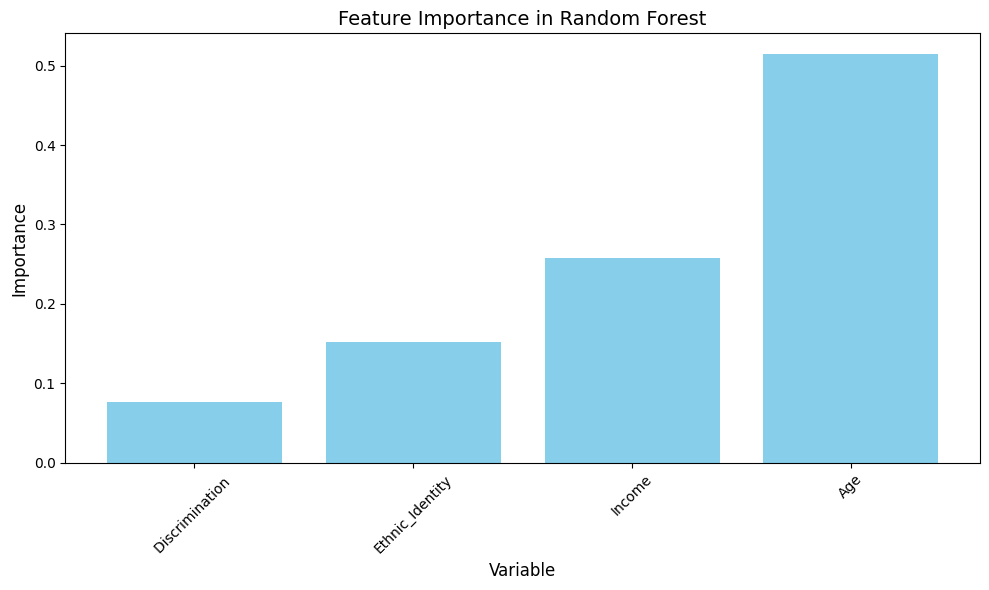


Decision Tree Performance:
Mean Squared Error (MSE): 0.897727234440288
R-squared (R2): 0.018037435315036987


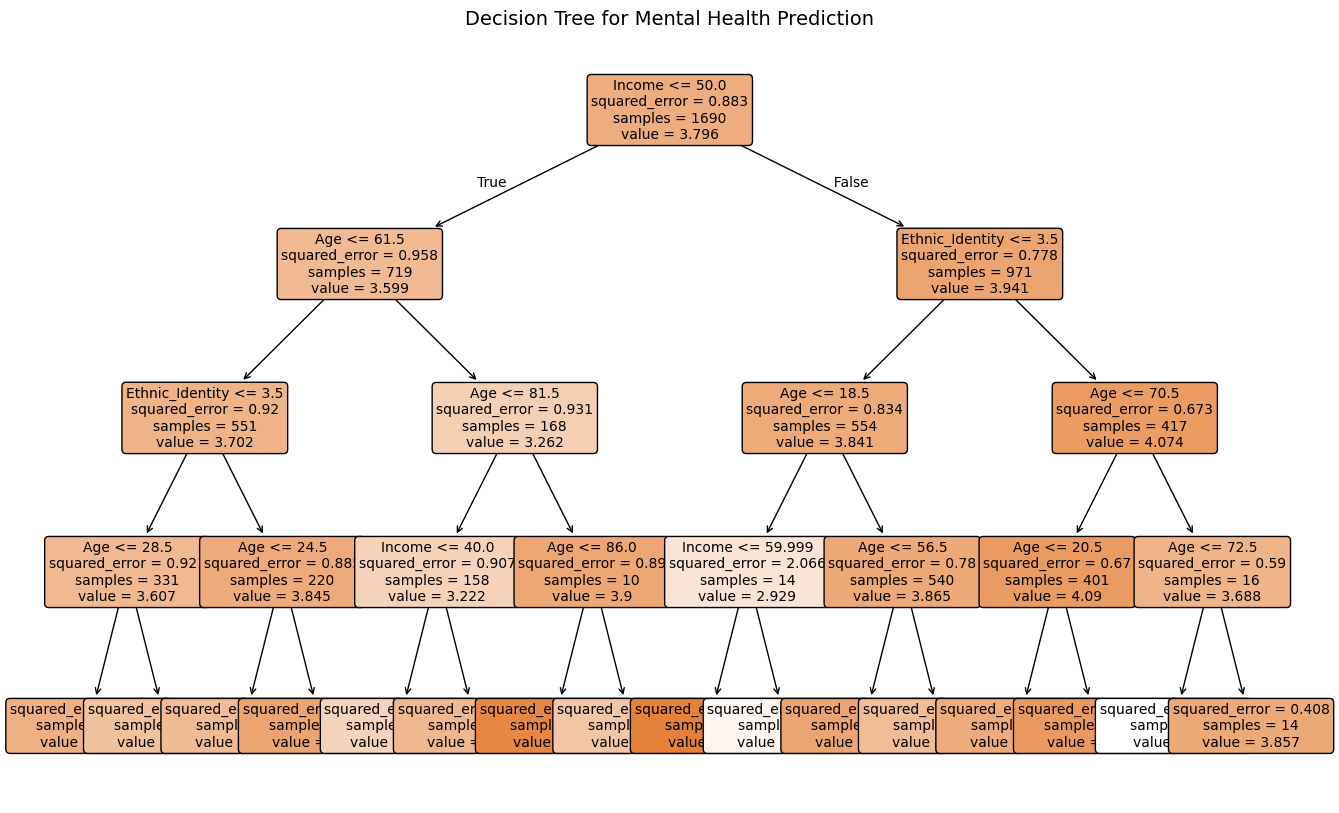


Random Forest Performance:
Mean Squared Error (MSE): 0.9273056127511189
R-squared (R2): -0.014316334417073584


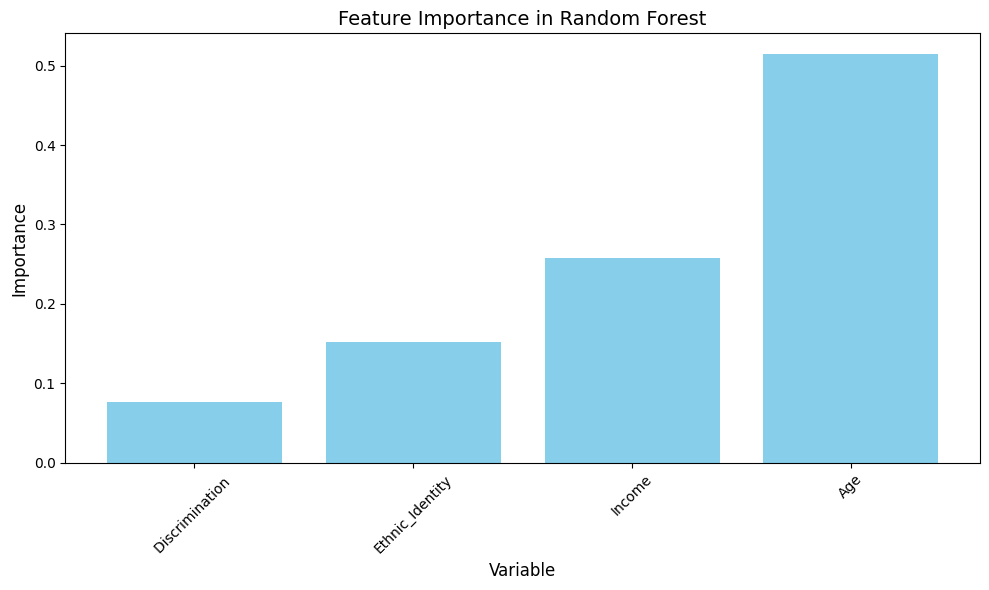


Subgroup Analysis by Ethnic Identity

Group 4.0 - Random Forest Performance:
Mean Squared Error (MSE): 0.897509468991327
R-squared (R2): -0.009548100876111576

Group 3.0 - Random Forest Performance:
Mean Squared Error (MSE): 0.8859960091280071
R-squared (R2): -0.02140931748826702

Group 2.0 - Random Forest Performance:
Mean Squared Error (MSE): 1.2749460074298546
R-squared (R2): -0.09675686705414432

Group 0.0 - Not enough data for analysis

Group 1.0 - Not enough data for analysis


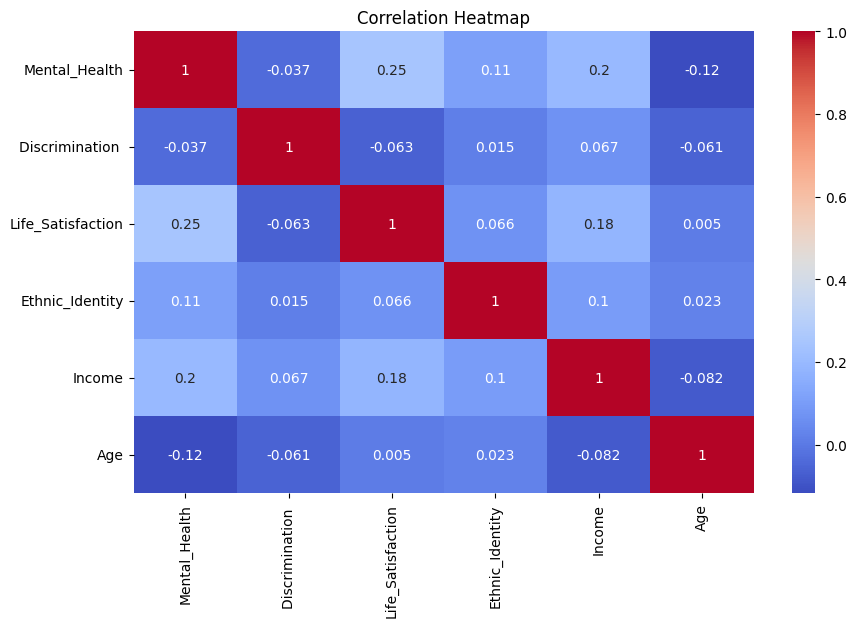

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as vif
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest Regressor
# Define the model with optimized hyperparameters
rforest = RandomForestRegressor(
    n_estimators=200,  # Increased number of trees
    max_depth=7,       # Increased depth for more flexibility
    random_state=42
)

# Train the model
rforest.fit(X_train, Y_train)

# Predict on test set
Y_rf_pred = rforest.predict(X_test)

# Evaluate performance
rf_mse = mean_squared_error(Y_test, Y_rf_pred)
rf_r2 = r2_score(Y_test, Y_rf_pred)
print("\nRandom Forest Performance:")
print("Mean Squared Error (MSE):", rf_mse)
print("R-squared (R2):", rf_r2)

# Feature Importance Visualization
plt.figure(figsize=(10, 6))
plt.bar(X.columns, rforest.feature_importances_, color='skyblue')
plt.title('Feature Importance in Random Forest', fontsize=14)
plt.ylabel('Importance', fontsize=12)
plt.xlabel('Variable', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Load Dataset
file_path = '/content/Final_Report_of_the_Asian_American_Quality_of_Life__AAQoL_ .csv'
df = pd.read_csv(file_path)

#Data Cleaning
satisfaction_mapping = {
    "Strongly disagree": 1, "Disagree": 2, "Slightly disagree": 3,
    "Neither agree or disagree": 4, "Slightly agree": 5, "Agree": 6, "Strongly agree": 7
}

mental_health_mapping = {
    "Poor": 1, "Fair": 2, "Good": 3, "Very Good": 4, "Excellent": 5
}

ethnic_identity_mapping = {
    "Not at all": 1, "Not very close": 2, "Somewhat close": 3, "Very close": 4
}

df['Life_Satisfaction'] = df['Satisfied With Life 1'].map(satisfaction_mapping).fillna(0)
df['Mental_Health'] = df['Present Mental Health'].map(mental_health_mapping).fillna(0)
df['Ethnic_Identity'] = df['Identify Ethnically'].map(ethnic_identity_mapping).fillna(0)

def preprocess_income(income):
    if pd.isna(income):
        return np.nan
    elif '-' in income:
        low, high = income.replace('$', '').replace(',', '').split(' - ')
        return (float(low) + float(high)) / 2
    elif 'over' in income:
        return float(income.replace('$', '').replace(',', '').split(' ')[0]) + 1
    else:
        return np.nan

df['Income'] = df['Income'].apply(preprocess_income) / 1000

columns_to_clean = ['Life_Satisfaction', 'Mental_Health', 'Ethnic_Identity', 'Discrimination ', 'Income', 'Age']
df = df[columns_to_clean].dropna()

#Decision Tree Regression
X = df[['Discrimination ', 'Ethnic_Identity', 'Income', 'Age']]
Y = df['Mental_Health']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

dtree = DecisionTreeRegressor(max_depth=4, random_state=42)
dtree.fit(X_train, Y_train)

# Predictions
Y_pred = dtree.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("\nDecision Tree Performance:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Visualization of Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(dtree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Mental Health Prediction", fontsize=14)
plt.show()


#Random Forest Regressor
rforest = RandomForestRegressor(
    n_estimators=200,
    max_depth=7,
    random_state=42
)

rforest.fit(X_train, Y_train)

# Predict on test set
Y_rf_pred = rforest.predict(X_test)

rf_mse = mean_squared_error(Y_test, Y_rf_pred)
rf_r2 = r2_score(Y_test, Y_rf_pred)
print("\nRandom Forest Performance:")
print("Mean Squared Error (MSE):", rf_mse)
print("R-squared (R2):", rf_r2)

# Feature Visualization
plt.figure(figsize=(10, 6))
plt.bar(X.columns, rforest.feature_importances_, color='skyblue')
plt.title('Feature Importance in Random Forest', fontsize=14)
plt.ylabel('Importance', fontsize=12)
plt.xlabel('Variable', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Subgroup Analysis
print("\nSubgroup Analysis by Ethnic Identity")
for group in df['Ethnic_Identity'].unique():
    subgroup = df[df['Ethnic_Identity'] == group]
    X_sub = subgroup[['Discrimination ', 'Income', 'Age']]
    Y_sub = subgroup['Mental_Health']

    if len(subgroup) > 50:
        X_train_sub, X_test_sub, Y_train_sub, Y_test_sub = train_test_split(X_sub, Y_sub, test_size=0.2, random_state=42)
        rf_sub = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
        rf_sub.fit(X_train_sub, Y_train_sub)
        Y_pred_sub = rf_sub.predict(X_test_sub)

        print(f"\nGroup {group} - Random Forest Performance:")
        print("Mean Squared Error (MSE):", mean_squared_error(Y_test_sub, Y_pred_sub))
        print("R-squared (R2):", r2_score(Y_test_sub, Y_pred_sub))
    else:
        print(f"\nGroup {group} - Not enough data for analysis")


#Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Mental_Health', 'Discrimination ', 'Life_Satisfaction', 'Ethnic_Identity', 'Income', 'Age']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Linear Regression Performance:
Mean Squared Error (MSE): 0.8738441879181973
R-squared (R2): 0.044161470228542

Linear Regression Coefficients:
Discrimination : -0.1797
Ethnic_Identity: 0.1166
Income: 0.0074
Age: -0.0061


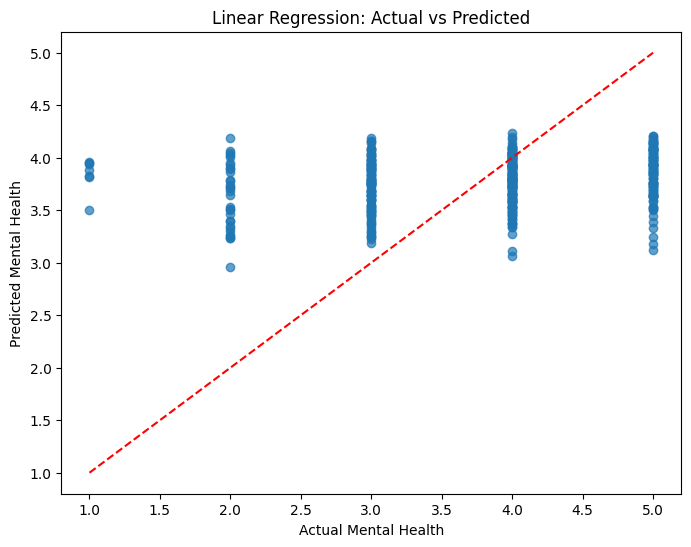

In [11]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

# Predictions
Y_lr_pred = lin_reg.predict(X_test)

print("\nLinear Regression Performance:")
print("Mean Squared Error (MSE):", mean_squared_error(Y_test, Y_lr_pred))
print("R-squared (R2):", r2_score(Y_test, Y_lr_pred))

# Coefficients
print("\nLinear Regression Coefficients:")
for feature, coef in zip(X.columns, lin_reg.coef_):
    print(f"{feature}: {coef:.4f}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_lr_pred, alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Mental Health")
plt.ylabel("Predicted Mental Health")
plt.show()
